# Part 1 - Process and Featuring

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/super/Population-EstimatesCSV.csv')
print(df)

                       CountryName CountryCode  \
0      Africa Eastern and Southern         AFE   
1      Africa Eastern and Southern         AFE   
2      Africa Eastern and Southern         AFE   
3      Africa Eastern and Southern         AFE   
4      Africa Eastern and Southern         AFE   
...                            ...         ...   
50269                     Zimbabwe         ZWE   
50270                     Zimbabwe         ZWE   
50271                     Zimbabwe         ZWE   
50272                     Zimbabwe         ZWE   
50273                     Zimbabwe         ZWE   

                                           IndicatorName      IndicatorCode  \
0      Age dependency ratio (% of working-age populat...        SP.POP.DPND   
1                              Age dependency ratio, old     SP.POP.DPND.OL   
2                            Age dependency ratio, young     SP.POP.DPND.YG   
3                         Age population, age 00, female  SP.POP.AG00.FE.IN   
4   

We first need to load the proper packages and load the respective csv file from World Bank Group. This shows us what the csv file is displaying. 

In [12]:
df = df.drop(columns='IndicatorCode')

df_clean = df[df["CountryCode"].str.len() == 3]

In [13]:
print(df)

                       CountryName CountryCode  \
0      Africa Eastern and Southern         AFE   
1      Africa Eastern and Southern         AFE   
2      Africa Eastern and Southern         AFE   
3      Africa Eastern and Southern         AFE   
4      Africa Eastern and Southern         AFE   
...                            ...         ...   
50269                     Zimbabwe         ZWE   
50270                     Zimbabwe         ZWE   
50271                     Zimbabwe         ZWE   
50272                     Zimbabwe         ZWE   
50273                     Zimbabwe         ZWE   

                                           IndicatorName           1960  \
0      Age dependency ratio (% of working-age populat...      88.967790   
1                              Age dependency ratio, old       5.631545   
2                            Age dependency ratio, young      82.970097   
3                         Age population, age 00, female            NaN   
4                       

Since there is a column (IndicatorCode) in our data set that we do not really need, we can just get rid of it by using .drop() function.

In [14]:
df = df.dropna()
print(df)

                       CountryName CountryCode  \
0      Africa Eastern and Southern         AFE   
1      Africa Eastern and Southern         AFE   
2      Africa Eastern and Southern         AFE   
70     Africa Eastern and Southern         AFE   
84     Africa Eastern and Southern         AFE   
...                            ...         ...   
50260                     Zimbabwe         ZWE   
50267                     Zimbabwe         ZWE   
50268                     Zimbabwe         ZWE   
50271                     Zimbabwe         ZWE   
50272                     Zimbabwe         ZWE   

                                           IndicatorName          1960  \
0      Age dependency ratio (% of working-age populat...  8.896779e+01   
1                              Age dependency ratio, old  5.631545e+00   
2                            Age dependency ratio, young  8.297010e+01   
70                                         Net migration -1.027040e+05   
84                         Po

In [15]:
df.drop(df.index[:9262], inplace=True)

Next, we can just get rid of entry that gives us NaN as this will mess up our analysis later if we leave it in. Then, we can drop the beginning rows of the csv file since the beginning does not give us singular countries in each row.

# Part 2 - Data Visualization and Statstical Analysis

In [21]:
new_df = df.melt(
    id_vars = ['CountryName', 'CountryCode', 'IndicatorName'],
    var_name = 'Year',
    value_name = 'Value'
)

df_indicator = df[df['IndicatorName'] == 'Population, total']

new_df['Year'] = new_df['Year'].astype(int)

Here we can just reconstruct the data format to make it easier to read by creating our new_df function. Then, since we just want to look at the total population for each country, we create the df_indicator function as well as making sure the years are integers.

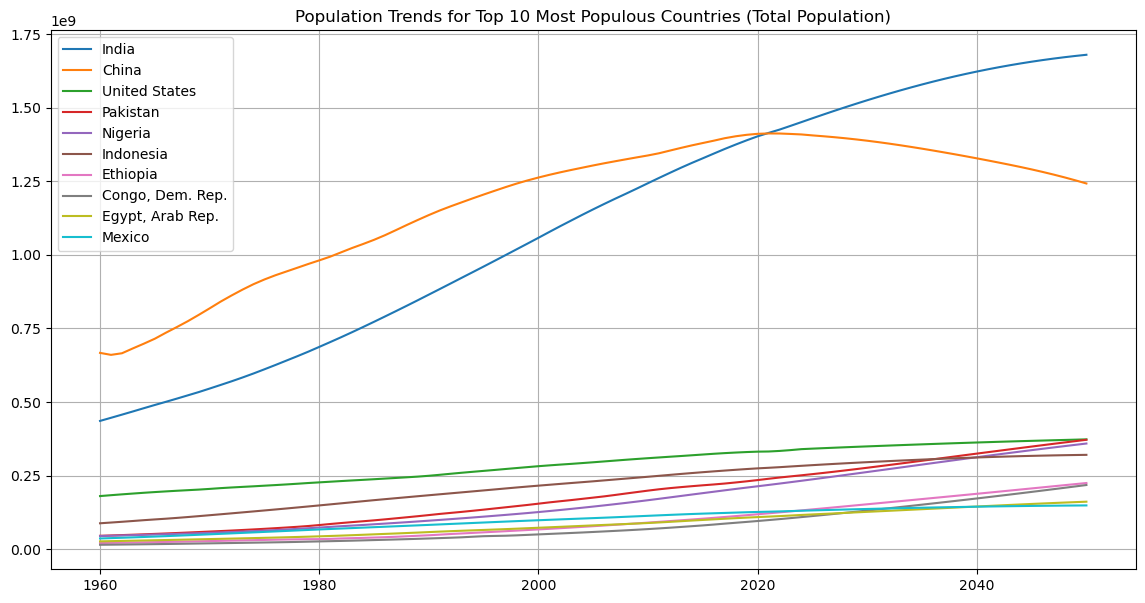

In [24]:
total_pop_df = new_df[new_df['IndicatorName'] == 'Population, total']

latest_year = total_pop_df['Year'].max()
latest_data = total_pop_df[total_pop_df['Year'] == latest_year]

latest_data = latest_data.drop_duplicates(subset='CountryName', keep='first')

top_countries = latest_data.sort_values('Value', ascending=False).head(10)['CountryName']

plt.figure(figsize=(14,7))

for country in top_countries:
    subset = total_pop_df[total_pop_df['CountryName'] == country]
    plt.plot(subset['Year'], subset['Value'], label=country)

plt.legend()
plt.grid(True)
plt.title("Population Trends for Top 10 Most Populous Countries (Total Population)")
plt.show()

Then, we visually show the population trends from 1960-2025 for the top 10 most populous countries in the world.

In [28]:
latest_year = population_df['Year'].max()

top10 = (
    population_df[population_df['Year'] == latest_year]
    .sort_values('Value', ascending=False)
    .head(10)['CountryName']
)

top10_df = population_df[population_df['CountryName'].isin(top10)]

mean_val = top10_df['Value'].mean()
median_val = top10_df['Value'].median()
std_val = top10_df['Value'].std()
min_val = top10_df['Value'].min()
max_val = top10_df['Value'].max()
count_val = top10_df['Value'].count()

print("Top 10 Most Populous Countries Statistics: ")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_val}")
print(f"Minimum: {min_val}")
print(f"Maximum: {max_val}")

Top 10 Most Populous Countries Statistics: 
Mean: 351457461.76153845
Median: 166877489.0
Standard Deviation: 433000174.634299
Minimum: 15264846.0
Maximum: 1679589259.0


Finally, we can show the mean, median, standard deviation, minimum value, and maximum value of each of the 10 most populous countries in the world. 

# Part 3 - Key Findings

Some key findings we have is that the top 10 most populous countries are: India, China, United States, Pakistan, Nigeria, Indonesia, Ethiopia, Democratic Rupublic of the Congo, Egypt, and Mexico. India is projected to have the highest population of 1,679,598,259 and Mexico is projected to have the 10th highest population of 15,264,846. From 1960 to about 2021-2022 China was the most populous country in the world, then India took over the number one spot in about 2021-2022. There is also 5 countries that are projected to have an upward trend through 2050: Democratic Republic of the Congo, Ethiopia, Nigeria, Pakistan, and India. 4 countries are projected to basically maintain the population through 2050: Mexico, Egypt, Indonesia, and United States. Lastly, China is the only country to see a decrease in population through 2050.